# Modelbase conversion

In [1]:
from src import Rate, Moiety, to_modelbase
from modelbase.ode import Simulator

## Manually created model

- You want to generate your model to fit exactly this way of writing

In [2]:
def function(s1: float, p1: float, nad: float, k1: float) -> float:
    return k1 * (s1 - p1) * nad


def moiety(substrate: float, total: float) -> float:
    return total - substrate


compounds = ["s1", "p1", "NADPH"]

parameters = {
    "k1": 3,
    "NA_total": 1,
}

rates = {
    "v1": Rate(
        func=function,
        substrates=["s1"],
        products=["p1"],
        modifiers=["NADP"],
        parameters=["k1"],
        reversible=True,
        args=["s1", "p1", "NADP", "k1"],
    )
}

moieties = {
    "m1": Moiety(
        func=moiety,
        derived_variable="NADP",
        compounds=["NADPH"],
        modifiers=None,
        parameters=["NA_total"],
        args=["NADPH", "NA_total"],
    )
}

stoichiometries_by_rate = {
    "v1": {"s1": -1, "NADPH": -1, "p1": 1},
}

## Conversion to modelbase

In [3]:
m = to_modelbase(
    compounds=compounds,
    parameters=parameters,
    moieties=moieties,
    rates=rates,
    stoichiometries=stoichiometries_by_rate,
)

y0 = {
    "NADPH": 0.5,
    "s1": 2,
    "p1": 1,
}

print(m.get_full_concentration_dict(y0))

{'NADPH': array([0.5]), 's1': array([2.]), 'p1': array([1.]), 'time': array([0.]), 'NADP': array([0.5])}


In [4]:
m.get_fluxes_df(y0)

v1
0.0  1.5

In [5]:
m.get_right_hand_side(y0)

{'ds1dt': -1.5, 'dp1dt': 1.5, 'dNADPHdt': -1.5}

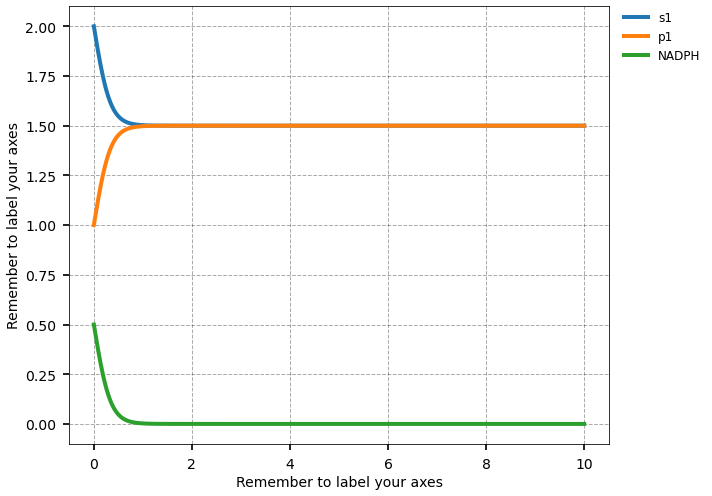

In [6]:
s = Simulator(m)
s.initialise(y0)
t, y = s.simulate(10)
fig, ax = s.plot()

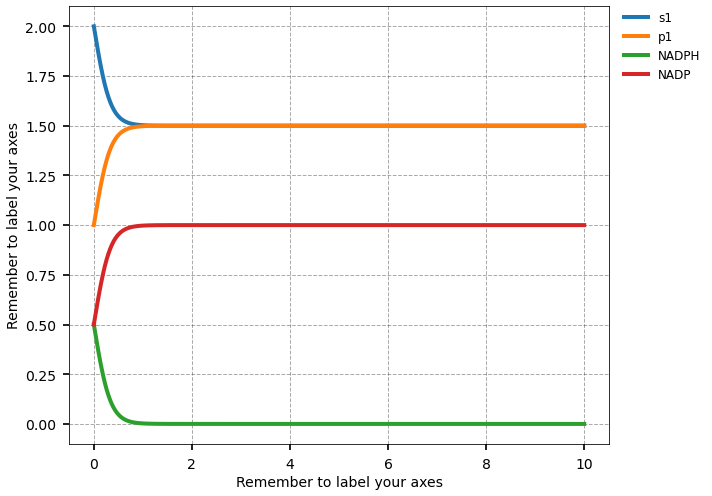

In [7]:
fig, ax = s.plot_all()

## Check modelbase documentation

[Documentation](https://gitlab.com/qtb-hhu/modelbase-software/-/blob/master/docs/source/feature-show.ipynb)